# Question 2: Materials Project API Exploration

**2.1 Querying Materials Project Database**

You will use the Materials Project API (MPRester and pymatgen) to query materials based on various criteria. You may choose to use the legacy or the new API.

a) Initialize MPRester and query materials to find stable (within 50meV of convex hull) binary oxides with density greater than 4 g/cc. For these materials extract materials properties from materials project. 

After completing everything I went back through this 

In [1]:
from mp_api.client import MPRester
import os

#set path to text file with the MP API key
filename = r'C:\Users\byron\OneDrive\Documents\Byron School\Materials Informatics\MP-apikey.txt'

def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

#set MP_APIKEY to the key
MP_APIKEY = get_file_contents(filename)

#set mpr as the MPRester to simplify later code
mpr = MPRester(MP_APIKEY)


No module named 'phonopy'
No module named 'phonopy'


In [2]:

#Standard search method .search uses property=(min,max)
#used arbitrarily large density as infinite max
docs = mpr.materials.summary.search(chemsys="*-O"
                                        ,energy_above_hull=(0,0.05)
                                        ,density=(4,1000000))

Retrieving SummaryDoc documents:   0%|          | 0/452 [00:00<?, ?it/s]

In [3]:
#Alternative _search method looks cleaner to me
docs = mpr.materials.summary._search(chemsys="*-O"
                                        ,energy_above_hull_max=0.05
                                        ,density_min=4)

Retrieving SummaryDoc documents:   0%|          | 0/452 [00:00<?, ?it/s]

b) Display basic information about the queried materials.



In [4]:
#print a list of formulas, densities, and the energy above hull values
#docs contains the full documents, so can be used to access all the data from these materials
print("Formula\tDensity(g/cm3)\t\tEnergyAboveHull (mEV)")
for doc in docs:
    print(doc.formula_pretty,"\t",doc.density,"\t",doc.energy_above_hull*1000)



Formula	Density(g/cm3)		EnergyAboveHull (mEV)
Ti6O 	 4.718230249800664 	 0.0
Tl2O 	 9.872476803873909 	 0.0431333333352768
Ti6O 	 4.716091494120648 	 11.608570714285449
Ag2O 	 7.163037725930793 	 0.0
PbO 	 9.142133142860956 	 9.288451250000662
CeO 	 8.465653204880008 	 0.0
VO 	 5.246172809281576 	 22.484775208333474
HgO 	 9.970012724699668 	 1.9320837499989807
NiO 	 6.762154477618838 	 0.0
VO 	 5.318032742750917 	 21.83531770833369
Ag3O 	 9.226616749406004 	 20.161739583333116
FeO 	 5.577375605140057 	 9.28005499999962
Tl2O 	 9.896563816701345 	 0.0
AgO 	 7.128585428207505 	 2.6362224999996187
Ti3O 	 4.890993432307026 	 0.0
HgO 	 10.77019190675644 	 0.0
CoO 	 5.3748211936732035 	 0.4125800000007729
CrO 	 4.454897474864885 	 47.315834166667514
Zr3O 	 6.699842819825176 	 7.423523749999106
LaO 	 7.567427835702962 	 17.204367499999762
BaO 	 5.859229670745691 	 0.0
ZnO 	 5.70421780686615 	 0.0
Zr3O 	 6.690771496809814 	 0.898194375000827
HgO 	 9.877796448579687 	 0.5084643750024043
TiO 	 5.

**2.2 Matching Structures to CIF Cards**

a) Using the Crystallographic Open Database (http://crystallography.net/cod/search.html) or the American Mineralogist Crystal Structure Database (https://rruff.geo.arizona.edu/AMS/amcsd.php) look up the cif card for your birth month (https://en.wikipedia.org/wiki/Birthstone). 

Then, see if you can use that cif card to find any Materials Project matches. Save the mp-id's to a list

My birthstone is Topaz.

There are several entries for topaz, with the following selected for review:

CIF 1544607 - Komatsu, et al 2003.  
    Al2 F2 O4 Si
    1atm/RT.  Sample Pax08

CIF 1544610 - Komatsu, et al 2003.  
    Al2 F2 O4 Si
    1atm/RT.  Sample Pax05

CIF 2003111 - Ivanov, et al 1998.  
    Al2 F2  O4 Si  
    Multipole Analysis of the Electron Density in Topaz Using X-ray Diffraction Data

In [6]:
#Three cif files were downloaded and each is put into ciffiles
#ciffiles is then used to get a list of mpids
ciffiles = [os.path.join('1544607.cif'),os.path.join('1544610.cif'),os.path.join('2003111.cif')]
list = [mpr.find_structure(ciffile) for ciffile in ciffiles]


MPRestError: REST post query returned with error status code 504 on URL https://api.materialsproject.org/materials/core/find_structure/?ltol=0.2&stol=0.3&angle_tol=5.0&_limit=1 with message:
Response error code: 504

In [ ]:
#print the list of mpids found - there is only one id found for all three cifs
for mpid in list:
    print(mpid)


mp-6280
mp-6280
mp-6280


In [ ]:

mpid=list[0]  #not really necessary
topaz = mpr.materials.summary.search(material_ids=[mpid])

mp-6280


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
topaz[0].density
topaz[0].energy_above_hull
topaz[0].formula_pretty
topaz[0].grain_boundaries
topaz[0].material_id
topaz[0].structure
topaz[0].symmetry

In [ ]:
#looks at the list of properties provided and prints each one 
#an alternative proach would be to pass the properties array 
#created here as the fields argument in the .search or ._search functions 
properties = ['material_id','density', 'energy_above_hull','formula_pretty','grain_boundaries','structure','symmetry','crystal_system']

# Assuming you have a variable named 'topaz' representing the material
topaz_properties = topaz[0]  # Assuming topaz[0] is the Material Project document object for topaz

#print the data for topaz
for property_name in properties:
    property_value = getattr(topaz_properties, property_name, None)
    print(f"{property_name}: {property_value}")


material_id: mp-6280
density: 3.437624929440984
energy_above_hull: 0.0
formula_pretty: Al2Si(O2F)2
grain_boundaries: None
structure: Full Formula (Al8 Si4 O16 F8)
Reduced Formula: Al2Si(O2F)2
abc   :   4.708015   8.497463   8.888792
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (36)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Al    0.09716   0.916758  0.130494         0
  1  Al    0.59716   0.083242  0.369506         0
  2  Al    0.90284   0.416758  0.869506         0
  3  Al    0.40284   0.583242  0.630494         0
  4  Al    0.59716   0.416758  0.369506         0
  5  Al    0.09716   0.583242  0.130494         0
  6  Al    0.40284   0.916758  0.630494         0
  7  Al    0.90284   0.083242  0.869506         0
  8  Si    0.603655  0.75      0.939948         0
  9  Si    0.103655  0.25      0.560052         0
 10  Si    0.396345  0.25      0.060052         0
 11  Si    0.896345  0.7

**2.3 Plotting Materials Properties**

Plot relevant properties extracted from the Materials Project database.

a) Extract and plot materials properties (e.g., density, formation energy) for the queried materials.

In [9]:
#your code goes here

# Extracting data from docs
materials = [doc.formula_pretty for doc in docs]
densities = [doc.density for doc in docs]
energies = [doc.energy_above_hull for doc in docs]

import pandas as pd

# Assuming materials, densities, and energies are lists extracted as shown above
data = {
    'Material': materials,
    'Density': densities,
    'Energy Above Hull': energies
}

# Create a DataFrame
properties = pd.DataFrame(data)

# Print the DataFrame
print(properties)


    Material   Density  Energy Above Hull
0       Ti6O  4.718230           0.000000
1       Tl2O  9.872477           0.000043
2       Ti6O  4.716091           0.011609
3       Ag2O  7.163038           0.000000
4        PbO  9.142133           0.009288
..       ...       ...                ...
447  Co21O40  4.834275           0.047841
448  Mo17O47  4.432453           0.008064
449   W17O47  7.031773           0.013802
450   W18O49  7.205941           0.003068
451   W25O73  6.741922           0.010815

[452 rows x 3 columns]


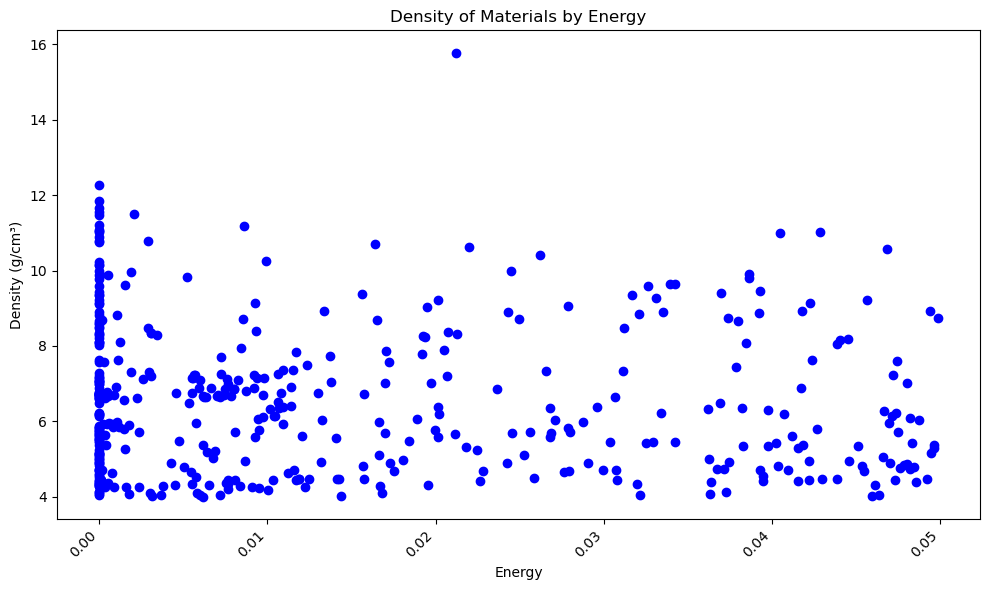

In [14]:

# Plotting

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(energies, densities, color='blue')
plt.xlabel('Energy')
plt.ylabel('Density (g/cm³)')
plt.title('Density of Materials by Energy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


This plot is not that meaningful, but is an example of pulling the data from the mp docs